# **Prediksi Jenis Tumor | Logistic Regression**

Memprediksi apakah seorang pasien terkena penyakit tumor payudara jenis yang ganas (Malignant) atau jinak (Benign).

## 1. Data Preparation

### 1.1 Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### 1.2 Read Dataset

In [2]:
df = pd.read_csv('breast-cancer.csv')

In [3]:
# 5 Data teratas
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# 5 baris terbawah
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
# Jumlah baris dan kolom
print('Jumlah baris = ', df.shape[0])
print('Jumlah kolom - ', df.shape[1])

Jumlah baris =  569
Jumlah kolom -  32


In [6]:
# Ringkasan informasi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Ringkasan statistik
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
# Hapus kolom yang tidak perlu
df.drop(columns=['id','radius_mean', 'perimeter_mean', 'area_mean',
'radius_se', 'perimeter_se',
'radius_worst', 'perimeter_worst','compactness_mean', 'concavity_mean','concave points_se', 'concave points_worst', 'concavity_worst'], inplace=True)

In [9]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [10]:
df.shape[1]

19

### 1.3 Cek Missing Value dan Baris Duplikat

#### 1.3.1 Cek Missing Value

In [11]:
# Jumlah missing value
print('Jumlah nilai kosong =', df.isnull().sum().sum())

Jumlah nilai kosong = 0


#### 1.3.2 Cek Data Duplikat

In [12]:
print('Jumlah data duplikat = ', df.duplicated().sum())

Jumlah data duplikat =  0


### 1.4 Encoding

In [13]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [14]:
df['diagnosis'] = df['diagnosis'].map({'M':0, 'B': 1})

In [15]:
df['diagnosis'].unique()

array([0, 1])

### 1.5 Deteksi Outlier

#### 1.5.1 Visualisasi Boxplot

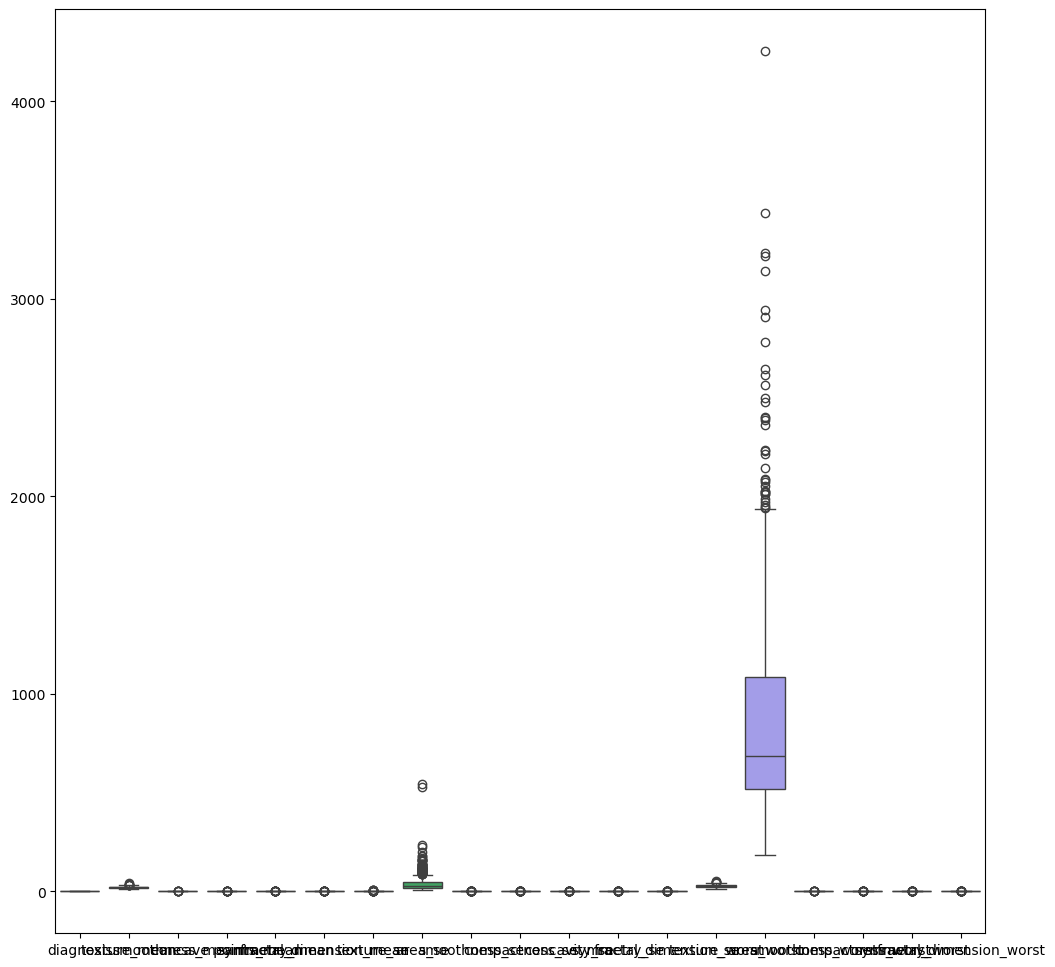

In [16]:
# boxplot
plt.figure(figsize=(12, 12))
sns.boxplot(df)
plt.show()

Terdapat outlier pada setiap variabel yang harus ditangani.

#### 1.5.2 Menangani Outlier

Kami menangani outlier menggguanakan metode IQR.

In [17]:
columns = df.select_dtypes(include=['int64', 'float64']).columns
columns = columns.drop('diagnosis')

# Perulangan untuk cek outlier masing - masing kolom
for col in columns:

    # Menentukan kuartil atas dan bawah
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
     
    # Menghitung interquartil
    IQR = Q3 - Q1 

    # Menentukan batas atas dan bawah
    batas_bawah = Q1 - 1.5 * IQR
    batas_atas = Q3 + 1.5 * IQR
    
    # Menghitung jumlah outlier
    outlier = (df[col] < batas_bawah) | (df[col] > batas_atas)
    outlier_count = outlier.sum()

    print(f"Kolom = {col}")
    print(f'Jumlah outlier = {outlier_count}\n')

    # Mengubah outlier menjadi median
    median_fix = df[col].median()

    df.loc[outlier, col] = median_fix
    

Kolom = texture_mean
Jumlah outlier = 7

Kolom = smoothness_mean
Jumlah outlier = 6

Kolom = concave points_mean
Jumlah outlier = 10

Kolom = symmetry_mean
Jumlah outlier = 15

Kolom = fractal_dimension_mean
Jumlah outlier = 15

Kolom = texture_se
Jumlah outlier = 20

Kolom = area_se
Jumlah outlier = 65

Kolom = smoothness_se
Jumlah outlier = 30

Kolom = compactness_se
Jumlah outlier = 28

Kolom = concavity_se
Jumlah outlier = 22

Kolom = symmetry_se
Jumlah outlier = 27

Kolom = fractal_dimension_se
Jumlah outlier = 28

Kolom = texture_worst
Jumlah outlier = 5

Kolom = area_worst
Jumlah outlier = 35

Kolom = smoothness_worst
Jumlah outlier = 7

Kolom = compactness_worst
Jumlah outlier = 16

Kolom = symmetry_worst
Jumlah outlier = 23

Kolom = fractal_dimension_worst
Jumlah outlier = 24



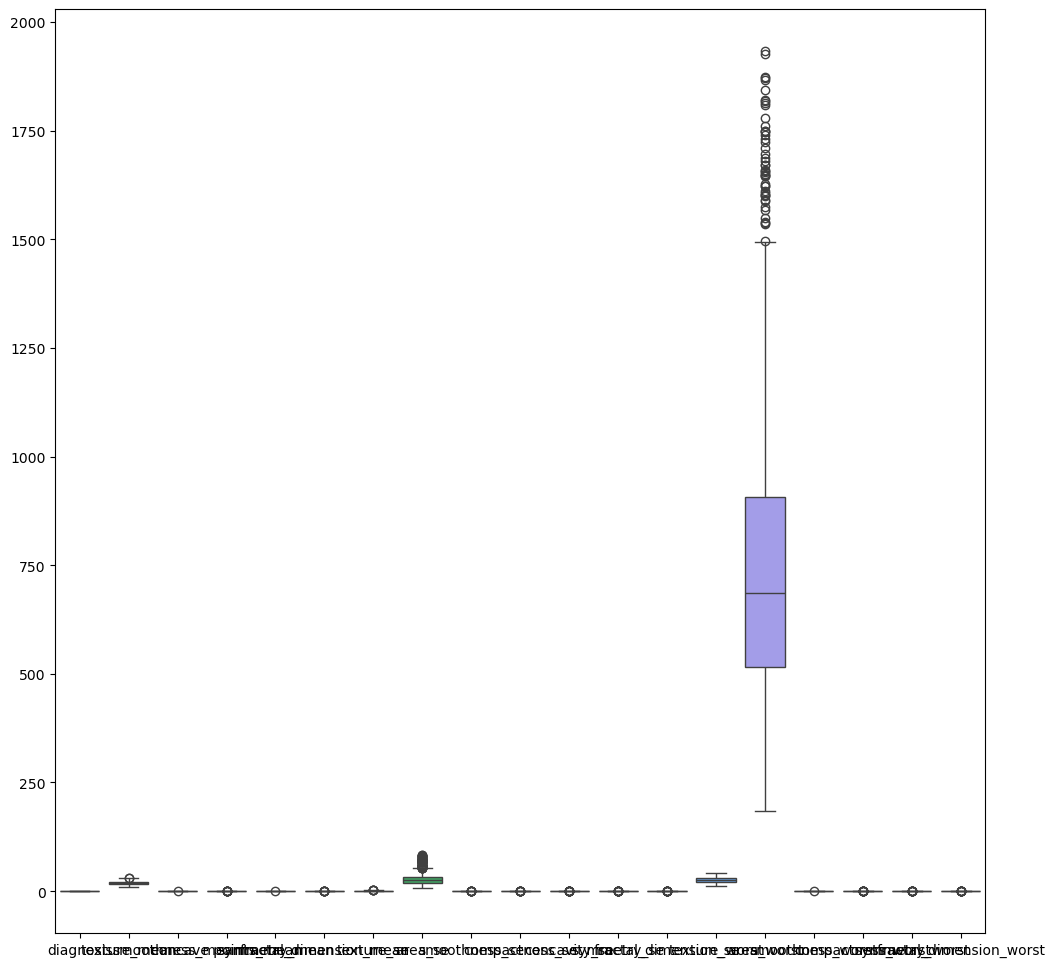

In [18]:
# Cek ulang visualisasi
plt.figure(figsize=(12,12))
sns.boxplot(df)
plt.show()

Setelah menangani outlier, nilai outlier semakin mengecil.

## 2. Exploratory Data Analysis

### 2.1 Korelasi

In [19]:
df.shape

(569, 19)

In [20]:
print(df.columns.tolist())


['diagnosis', 'texture_mean', 'smoothness_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [21]:
# Cek korelasi dengan metode spearman 
corr_spearman = df.corr(method='spearman')
corr_spearman

,diagnosis,texture_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,concavity_se,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,-0.456207,-0.367798,-0.759402,-0.319526,0.022042,-0.028537,-0.577264,0.012726,-0.389278,-0.489895,0.136571,-0.221600,-0.463332,-0.726192,-0.419649,-0.567869,-0.334726,-0.272363
texture_mean,-0.456207,1.000000,0.041994,0.285966,0.123113,-0.050175,0.433271,0.330535,0.076482,0.256116,0.290944,0.016611,0.159068,0.900046,0.337619,0.101802,0.255225,0.092281,0.094384
smoothness_mean,-0.367798,0.041994,1.000000,0.531590,0.499166,0.559823,0.087160,0.231797,0.298385,0.384276,0.341534,0.113144,0.408413,0.073225,0.149956,0.766703,0.439083,0.352353,0.464619
concave points_mean,-0.759402,0.285966,0.531590,1.000000,0.392592,0.120013,-0.003315,0.580147,0.034721,0.576255,0.658951,-0.074345,0.346534,0.278824,0.711839,0.460995,0.715175,0.302851,0.380978
symmetry_mean,-0.319526,0.123113,0.499166,0.392592,1.000000,0.363791,0.116746,0.210459,0.170649,0.397061,0.321389,0.306718,0.360377,0.133137,0.139239,0.392191,0.378930,0.641689,0.334388
fractal_dimension_mean,0.022042,-0.050175,0.559823,0.120013,0.363791,1.000000,0.122564,-0.102477,0.322473,0.391527,0.260447,0.244865,0.618900,-0.041985,-0.254366,0.477688,0.335727,0.247083,0.693141
texture_se,-0.028537,0.433271,0.087160,-0.003315,0.116746,0.122564,1.000000,0.153921,0.373668,0.195697,0.160131,0.309769,0.257796,0.494456,-0.128907,-0.016318,-0.073886,-0.103842,-0.043278
area_se,-0.577264,0.330535,0.231797,0.580147,0.210459,-0.102477,0.153921,1.000000,0.057932,0.315151,0.355099,0.043771,0.197968,0.279005,0.626165,0.161157,0.309926,0.084653,0.049135
smoothness_se,0.012726,0.076482,0.298385,0.034721,0.170649,0.322473,0.373668,0.057932,1.000000,0.235917,0.233201,0.408830,0.387250,0.012318,-0.246995,0.336099,-0.014341,-0.042528,0.116575
compactness_se,-0.389278,0.256116,0.384276,0.576255,0.397061,0.391527,0.195697,0.315151,0.235917,1.000000,0.840732,0.207363,0.708329,0.214160,0.277497,0.320052,0.745595,0.235123,0.507998


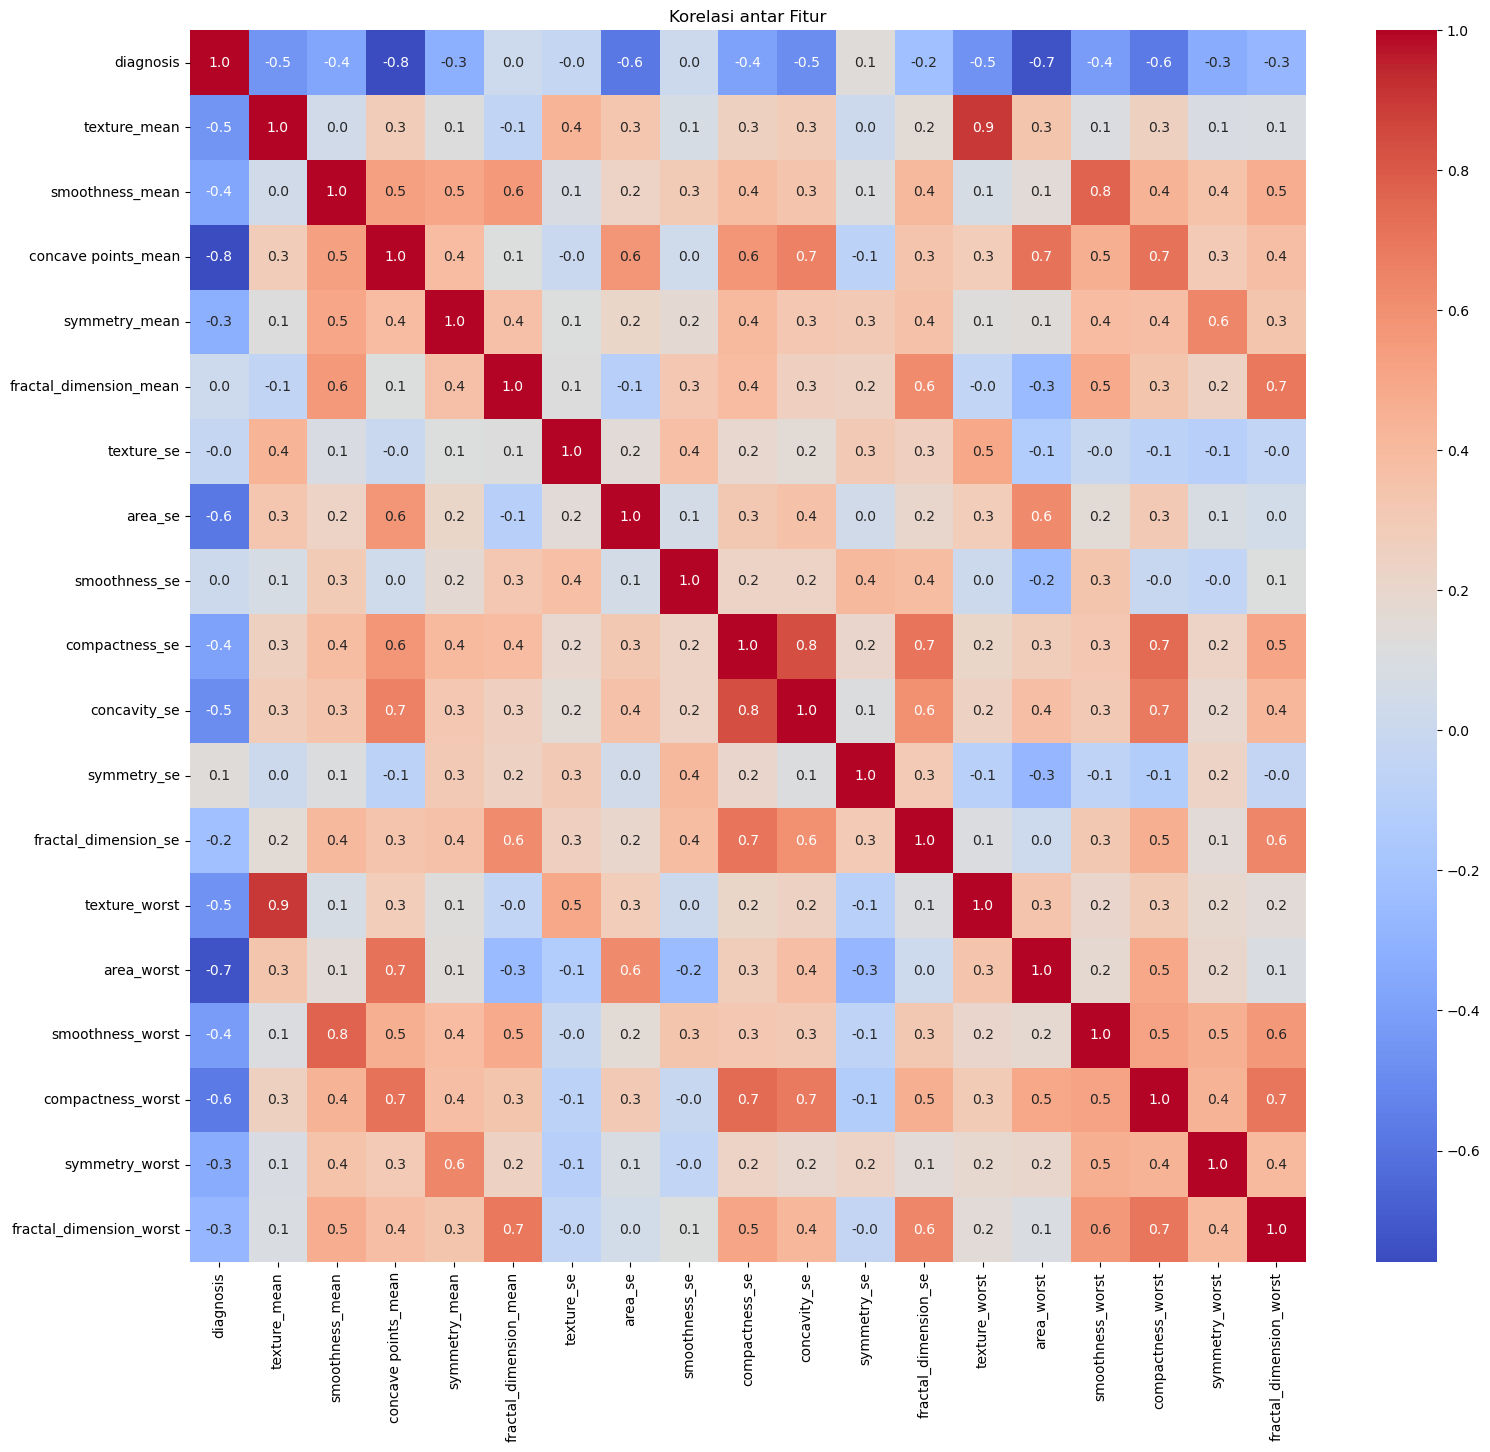

In [40]:
# Korelasi dengan heatmap

plt.figure(figsize=(18,16))
plt.title('Korelasi antar Fitur')
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt='.1f')
plt.show()

## 3. Modeling

### 3.1 Memisah Fitur Independent dan Dependent

In [23]:
X = df.drop('diagnosis', axis=1).values
X = (X - X.mean(axis=0)) / X.std(axis=0) # Independent
y = df['diagnosis'].values.reshape(-1, 1) # Dependent

### 3.2 Split Data

Kami memisah data menjadi:
- 80% data train,
- 20% data test.


Menggunakan Stratified Split Data.


In [24]:
idx_0 = np.where(y == 0)[0]
idx_1 = np.where(y == 1)[0]

np.random.shuffle(idx_0)
np.random.shuffle(idx_1)

train_0 = int(len(idx_0) * 0.8)
train_1 = int(len(idx_1) * 0.8)

train_idx = np.concatenate([idx_0[:train_0], idx_1[:train_1]])
test_idx = np.concatenate([idx_0[train_0:], idx_1[train_1:]])

X_train = X[train_idx] 
X_test = X[test_idx] 
y_train = y[train_idx]
y_test  = y[test_idx]

In [25]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (454, 18)
X_test : (115, 18)
y_train: (454, 1)
y_test : (115, 1)


### 3.3 Model

In [39]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

m, n = X.shape
W = np.zeros((n, 1))
b = 0
learning_rate = 0.01

for i in range(2000):
    z = np.dot(X, W) + b
    A = sigmoid(z)

    loss = -(1/m) * np.sum(y*np.log(A + 1e-9) + (1-y)*np.log(1-A + 1e-9))

    dW = (1/m) * np.dot(X.T, (A - y))
    db = (1/m) * np.sum(A - y)

    W -= learning_rate * dW
    b -= learning_rate * db


    print("W:", W)
    print("b:", b)
    print("Loss akhir:", loss)

    if i % 100 == 0:
        print(f"Iterasi {i}, Loss: {loss:.4f}")



W: [[-1.99964016e-03]
 [-1.77305465e-03]
 [-3.72614052e-03]
 [-1.57047931e-03]
 [ 5.61698132e-06]
 [-7.89690276e-05]
 [-2.67922856e-03]
 [ 6.00423854e-05]
 [-1.73117575e-03]
 [-2.13825458e-03]
 [ 7.25655506e-04]
 [-9.28920885e-04]
 [-2.13162659e-03]
 [-3.48131539e-03]
 [-2.03558446e-03]
 [-2.73130429e-03]
 [-1.64778525e-03]
 [-1.36006725e-03]]
b: 0.001274165202108963
Loss akhir: 0.6931471785599453
Iterasi 0, Loss: 0.6931
W: [[-3.97656007e-03]
 [-3.51832269e-03]
 [-7.41200086e-03]
 [-3.11548947e-03]
 [ 2.56848940e-05]
 [-1.52340005e-04]
 [-5.33183665e-03]
 [ 1.26343545e-04]
 [-3.43116778e-03]
 [-4.24462853e-03]
 [ 1.44969160e-03]
 [-1.83492042e-03]
 [-4.23915453e-03]
 [-6.93006448e-03]
 [-4.04223754e-03]
 [-5.42468918e-03]
 [-3.27179163e-03]
 [-2.69338520e-03]]
b: 0.0025451446637833686
Loss akhir: 0.6857830558159561
W: [[-5.93104719e-03]
 [-5.23624252e-03]
 [-1.10581211e-02]
 [-4.63543004e-03]
 [ 5.98969120e-05]
 [-2.20221425e-04]
 [-7.95814501e-03]
 [ 1.98749763e-04]
 [-5.10046414e-03]

visualisasi scatter plto

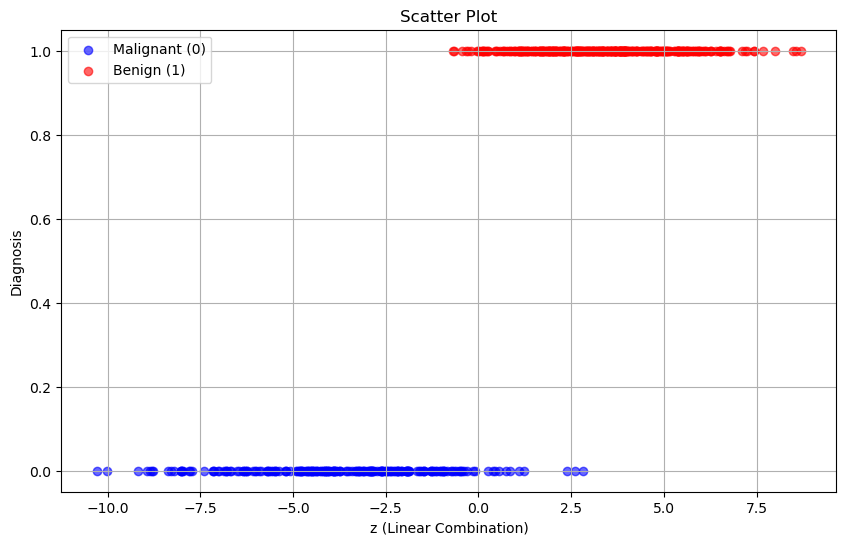

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(z[y[:, 0] == 0], y[y[:, 0] == 0], color='blue', label='Malignant (0)', alpha=0.6)
plt.scatter(z[y[:, 0] == 1], y[y[:, 0] == 1], color='red', label='Benign (1)', alpha=0.6)
plt.xlabel('z (Linear Combination)')
plt.ylabel('Diagnosis')
plt.title('Scatter Plot')
plt.legend()
plt.grid(True)
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\h'
<>:17: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_7810/614261542.py:17: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Diagnosis / Probabilitas Prediksi $\hat{y}$')


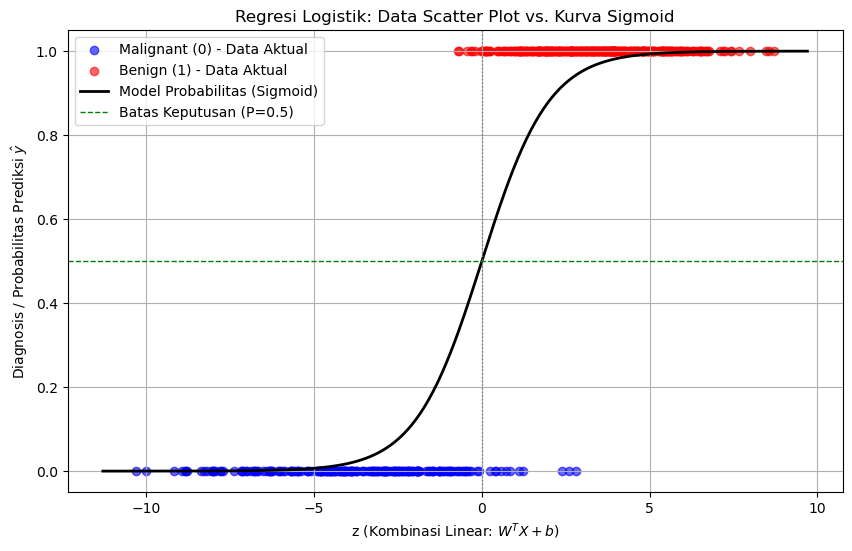

In [35]:
plt.figure(figsize=(10, 6))

plt.scatter(z[y[:, 0] == 0], np.zeros_like(z[y[:, 0] == 0]), 
            color='blue', label='Malignant (0) - Data Aktual', alpha=0.6)
plt.scatter(z[y[:, 0] == 1], np.ones_like(z[y[:, 0] == 1]), 
            color='red', label='Benign (1) - Data Aktual', alpha=0.6)

z_range = np.linspace(z.min() - 1, z.max() + 1, 500)
predicted_probability = sigmoid(z_range)

plt.plot(z_range, predicted_probability, color='black', linewidth=2, label='Model Probabilitas (Sigmoid)')

plt.axhline(0.5, color='green', linestyle='--', linewidth=1, label='Batas Keputusan (P=0.5)')
plt.axvline(0, color='gray', linestyle=':', linewidth=1)

plt.xlabel('z (Kombinasi Linear: $W^T X + b$)')
plt.ylabel('Diagnosis / Probabilitas Prediksi $\hat{y}$')
plt.title('Regresi Logistik: Data Scatter Plot vs. Kurva Sigmoid')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asumsi: W, b, X, dan y sudah didapatkan dari proses training sebelumnya.
# Kita gunakan hasil training dari contoh sebelumnya:
# W: (2x1), b: skalar, X: (5x2), y: (5x1)

# --- 1. Fungsi untuk Plot ---
def plot_decision_boundary(X, y, W, b):
    # Buat figure baru
    plt.figure(figsize=(8, 6))
    
    # Scatter plot data points berdasarkan kelas (y)
    # y=0 (biru) dan y=1 (merah)
    plt.scatter(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], c='blue', marker='o', label='Kelas 0 (Jeruk)')
    plt.scatter(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], c='red', marker='x', label='Kelas 1 (Apel)')
    
    # --- Menghitung Garis Keputusan (Decision Boundary) ---
    # Garis keputusan adalah saat W1*x1 + W2*x2 + b = 0
    # Kita akan mencari x2 (sumbu Y) sebagai fungsi dari x1 (sumbu X)
    
    # Ambil rentang nilai untuk sumbu X (x1)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_plot = np.linspace(x1_min, x1_max, 100)
    
    # Hitung x2 menggunakan rumus garis keputusan:
    # x2 = (-1/W2) * (W1*x1 + b)
    
    # Pastikan W2 tidak nol untuk menghindari pembagian dengan nol
    if W[1, 0] != 0:
        # Ambil nilai bobot dari W (W1 dan W2) dan Bias (b)
        W1 = W[0, 0]
        W2 = W[1, 0]
        b_val = b
        
        x2_plot = (-1/W2) * (W1 * x1_plot + b_val)
        
        # Plot garis keputusan
        plt.plot(x1_plot, x2_plot, 'k-', label='Garis Keputusan (Probabilitas 0.5)')
    else:
        # Jika W2 nol, garisnya vertikal
        plt.axvline(x=-b/W[0, 0], color='k', linestyle='-', label='Garis Keputusan (Probabilitas 0.5)')

    # Atur label dan judul
    plt.xlabel('Fitur 1 (x1)')
    plt.ylabel('Fitur 2 (x2)')
    plt.title('Scatter Plot dan Garis Keputusan Regresi Logistik')
    plt.legend()
    plt.grid(True)
    plt.show()

# --- 2. Panggil Fungsi Plot dengan Hasil Training ---
# PERHATIAN: Pastikan variabel W dan b adalah hasil akhir dari kode training Anda.

# Panggil fungsi plot
plot_decision_boundary(X, y, W, b)